In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from pathlib import Path
import ast
from IPython.display import display
import numpy as np
import seaborn as sns

override_files = (list(Path('.').glob('**/overrides.yaml')))
df = pd.DataFrame()
for override_file in override_files:    
       
    factors = yaml.safe_load(override_file.read_text())
    factors = dict([elm.split('=') for elm in factors if elm[0] != '+'])
    
    factors = pd.DataFrame(factors,index=range(0,int(factors['epochs']))) #Factors df with a duplicate row per epoch
    factors['epoch'] = list(range(1,int(factors.epochs[0]) + 1 )) #Adding epoch number to each row
    
    log_file =  override_file.parent.parent /'TrainModel.log'
    with open(log_file) as f:
        metrics = [log.split("- ")[-1].strip().split(': ') for log in f.readlines()]
        metrics = pd.DataFrame({k:ast.literal_eval(v) for k,v in metrics}) #Metric df containing the log metrics
    
    #concat factor and metrics dfs to the final df
    df = pd.concat([df, pd.concat([factors, metrics],axis=1)])
    

In [2]:
df = df.rename(columns={'modelconf.regularizersconf.L1L2_regularizer.l1':'L1','modelconf.regularizersconf.L1L2_regularizer.l2': 'L2'})
df.L1 = df.L1.astype('float64')
df.L2 = df.L2.astype('float64')
df.epoch = df.epoch.astype('uint8')

In [3]:
desc = df[df.epoch > 6].groupby(['L1','L2']).describe()
val_acc = desc['Validation Accuracy'].reset_index().sort_values('50%', ascending=False)
train_acc = desc['Train Accuracy'].reset_index().sort_values('50%', ascending=False)

In [6]:
val_acc[val_acc['50%'] > 0.75]

,L1,L2,count,mean,std,min,25%,50%,75%,max
4,0.00000,0.01000,70.0,0.766767,0.034806,0.662084,0.745930,0.775868,0.789345,0.832127
3,0.00000,0.00100,70.0,0.775858,0.052221,0.629161,0.753708,0.770622,0.807435,0.895803
13,0.00010,0.00001,70.0,0.749938,0.042883,0.628437,0.722865,0.759768,0.780029,0.838278
2,0.00000,0.00010,70.0,0.754378,0.034446,0.646165,0.738513,0.759588,0.776321,0.823083
15,0.00010,0.00100,70.0,0.737492,0.061240,0.510854,0.722685,0.756693,0.775959,0.813314
1,0.00000,0.00001,70.0,0.749225,0.054622,0.582489,0.712916,0.756331,0.790883,0.838278
18,0.00100,0.00000,70.0,0.748511,0.037851,0.637844,0.725488,0.756151,0.770984,0.823083
8,0.00001,0.00010,70.0,0.748077,0.039850,0.652315,0.726031,0.755246,0.779758,0.809334
6,0.00001,0.00000,70.0,0.741322,0.053336,0.603835,0.712645,0.752171,0.775778,0.838640


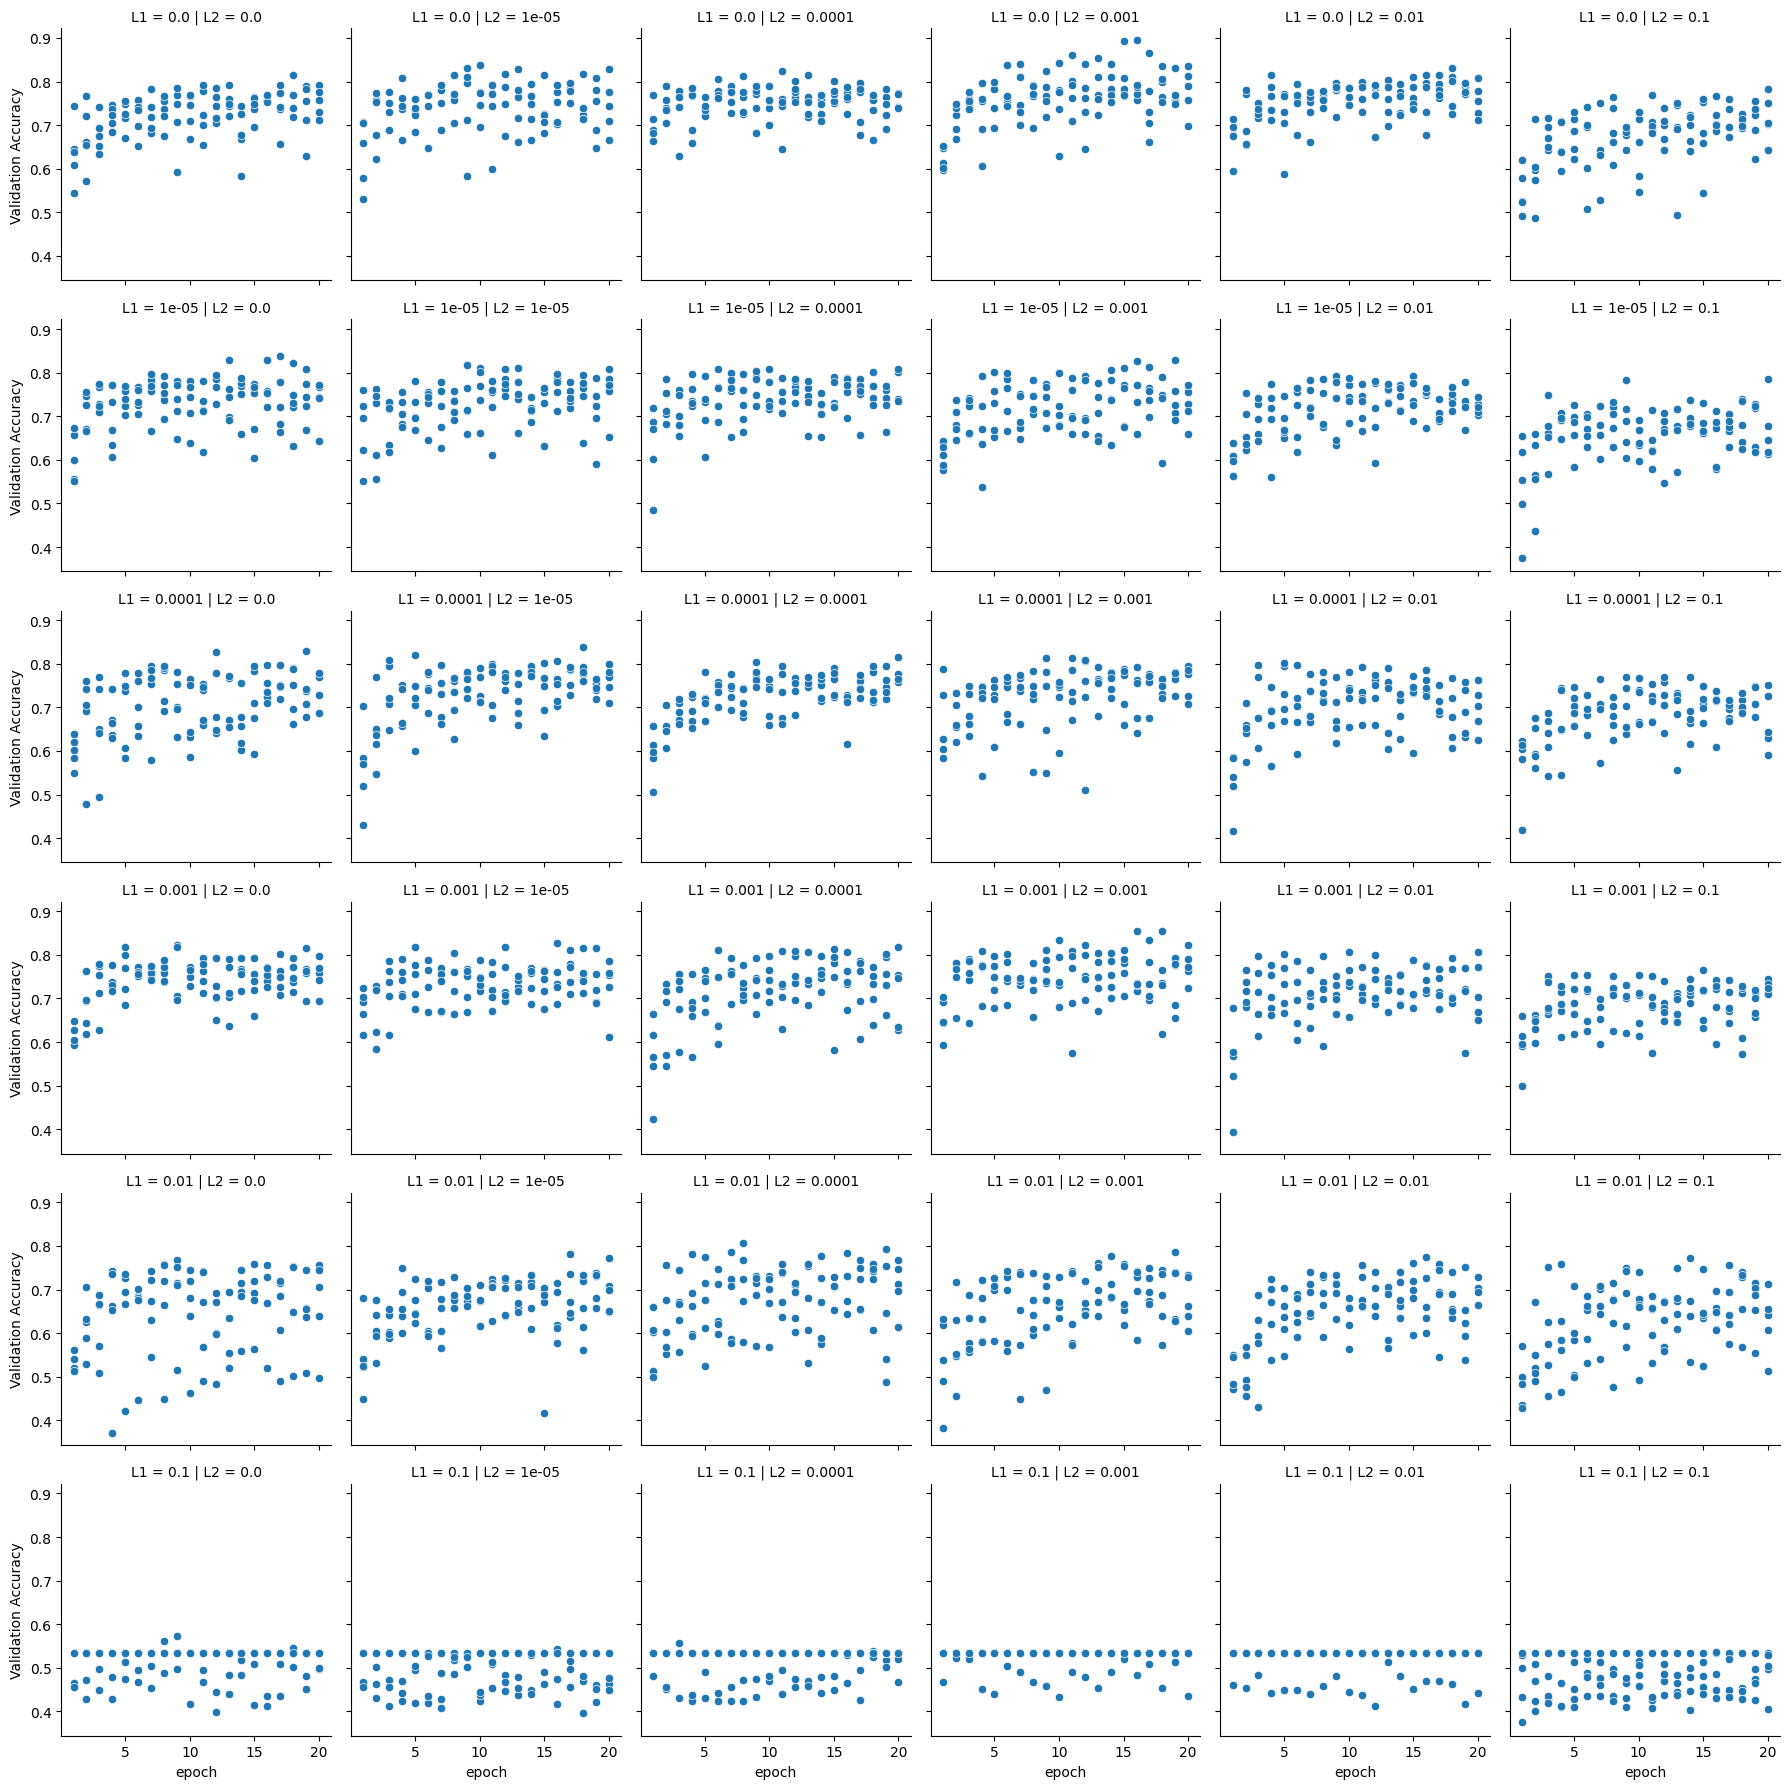

In [5]:
g = sns.FacetGrid(df, row = 'L1', col = 'L2')
g.map_dataframe(sns.scatterplot, x='epoch', y='Validation Accuracy')
plt.tight_layout()

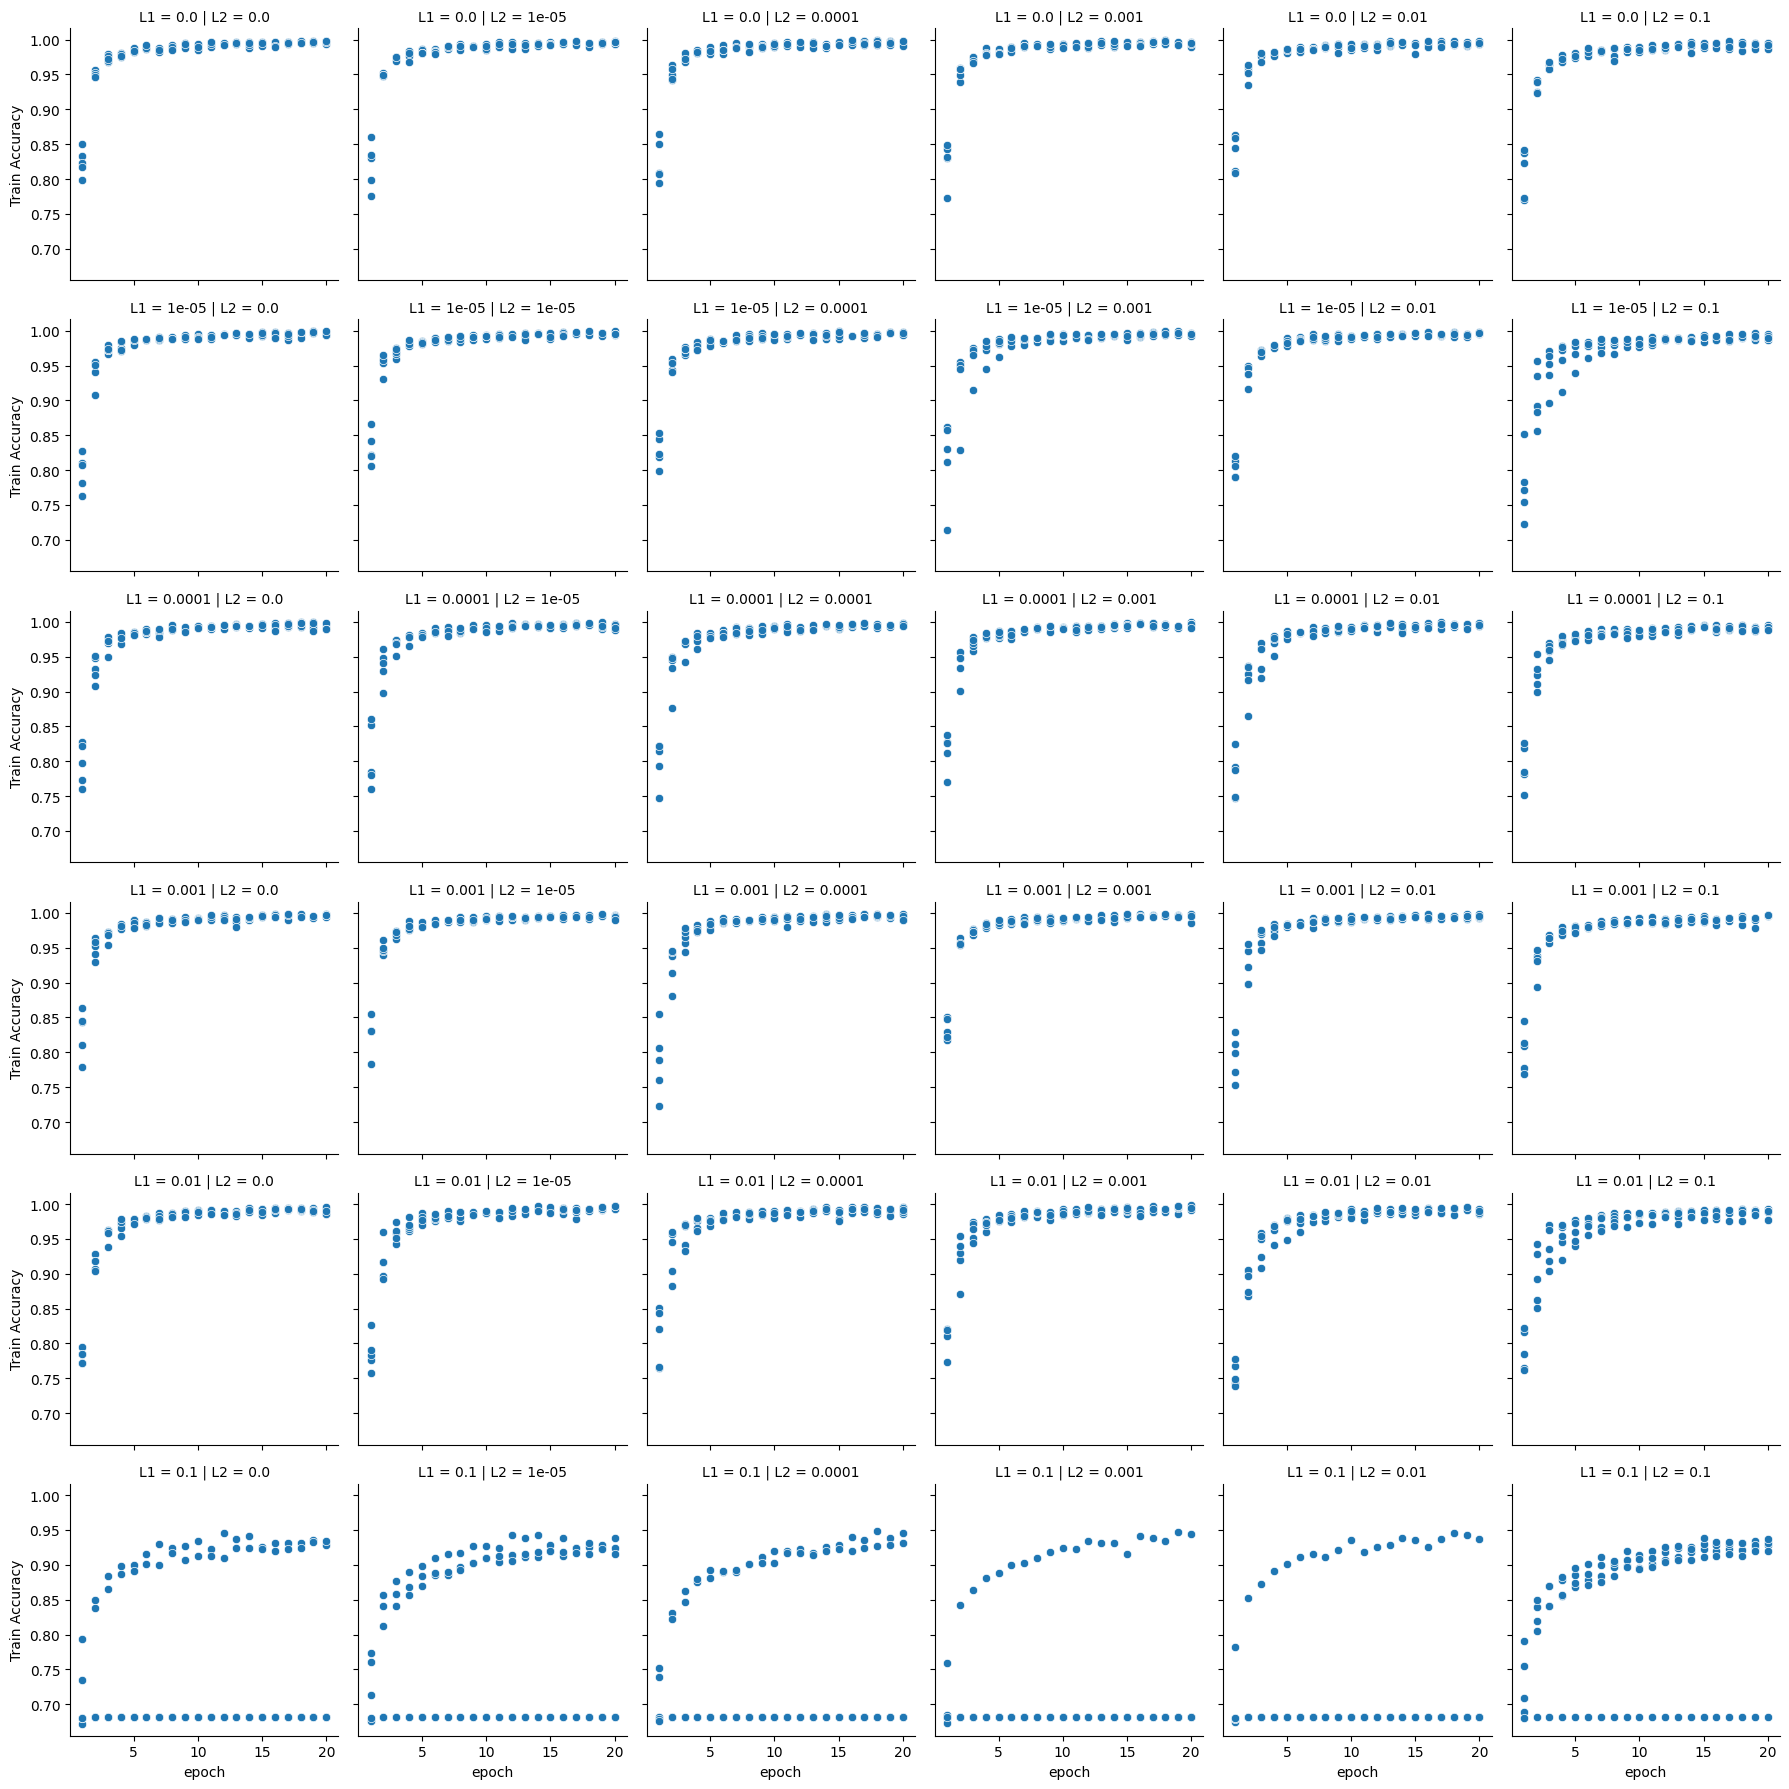

In [7]:
g = sns.FacetGrid(df, row = 'L1', col = 'L2')
g.map_dataframe(sns.scatterplot, x='epoch', y='Train Accuracy')
plt.tight_layout()